### Transformacións de Moebius

Unha _Transformación de Moebius_ é unha función de variable complexa da forma $f(z)= \frac{az+b}{cz+d}$ onde $ a,b,c,d \in \mathbb{C}$ e $ ad-bc \neq 0 $ <br>
A súa definición pode extenderse ao $\infty$ $(\mathbb{C} ^*=\mathbb{C} \cup {\infty}$ = _Esfera de Riemann_ ) coas seguintes consideracións:

- $f(\infty)=\frac{a}{c}$
- $f(-\frac{d}{c})=\infty$

### Propiedades

- Son funcións holomorfas (infinitamente diferenciables en todo $ \mathbb{C}^*$).
- Teñen dous puntos fixos (contados coa súa multiplicidade).
- Son aplicacións conformes (en $\mathbb{C}$) que levan circunferencias en circunferencias, onde unha recta é considerada tamén unha circunferencia "pechándose" ao pasar polo punto do $\infty$.
- A composición de transformacións de Moebius é tamén unha transformación de Moebius (de feito forman un grupo de Lie)
- O grupo das transformacións de Moebius forman un grupo que ten como subgrupo o subconxunto formado polas transformacións que verifican que $ad-bc=1$
- Os elementos deste subgrupo transforman o semiplano superior _H_ en si mesmo constituindo un modelo de estructura xeométrica hiperbólica de Poincaré 
- As transformacións da forma $ f(z)=e^{i\phi}\frac{z+b}{\bar bz+1}$ con $\phi \in \mathbb{R}$ e $b \in \mathbb{C}, |b|<1$ son aplicacións conformes e bixectivas sobre o disco de raio 1 que constitúen outro modelo de xeometría hiperbólica
- O elemento dese subgrupo $ f(z)=\frac{z+i}{\bar iz+1}$ é unha bixección conforme entre o semiplano superior e o interior do disco de raio 1.


In [212]:

import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np

#Circunferencia de radio r
def d1(r,t):
    return r*np.exp(2.0j*np.pi*t)
#Radial de ángulo alfa
def radial(alfa,t):
    return t*np.exp(1.0j*alfa)

#Coloreo os gráficos nun gradiente establecido pola matplotlib
colorMap=plt.cm.viridis


#Fixo os parámetros gráficos sobre o número de obxectos no dominio (rectas, circunferencias)
#... e o número de puntos en cada obxecto
NUM_OBXECTOS=1000
NUM_PTOS_OBXECTO=1000

### Visualización das transformacións

Distinguiremos 9 casos:

1.**Transformación Aleatoria** xerando aleatoriamente a,b,c,d no rectángulo [-1,1]x[-1,1] <br>
2.**Inversión** $f(z)=\frac{1}{z}$<br>
3.**Transformacións que deixan invariante o disco unidade** $ f(z)=e^{i\phi}\frac{z+b}{\bar bz+1}$ con $\phi \in \mathbb{R}$ e $b \in \mathbb{C}, |b|<1$ <br>
4.**Isomorfismo entre o o disco e o semiplano superior** $ f(z)=\frac{z+i}{ iz+1}$ <br>
5.**Transformacións Parabólicas** do tipo $ f(z)=\frac{z+\lambda}{ 0z+1}$ Son translacións do plano complexo que deixan invariante o punto do infinito<br>
6.**Transformacións Circular**, do tipo $a=i$ , $b=0$ , $c=-i$ , $d=0$<br>
7.**Transformacións Elípticas**, do tipo $a=cos\alpha$ , $b=-sen\alpha$ , $c=sen\alpha$ , $d=cos\alpha$<br> ou equivalentemente $a=e^{i\theta/2}$ , $b=0$ , $c=e^{-i\theta/2}$ , $d=0$<br>
8.**Transformacións Hiperbólicas**, do tipo $a=e^{\theta/2}$ , $b=0$ , $c=e^{-\theta/2}$ , $d=0$<br>
9.**Transformacións Loxodrómicas**, do tipo $a=\lambda$ , $b=0$ , $c=\lambda^{-1}$ , $d=0$ con $\lambda + \lambda^{-1} \in \mathbb{C} - [0,4]$ <br>

In [213]:
import random
#Defino o conxunto de transformacións nunha clase
class MoebiusClass:
    #Parámetros
    def __init__(self, a, b,c,d):
        self.a = a
        self.b = b
        self.c = c
        self.d = d
    #Inicializar en branco para facer un set posterior
    def __init__(self):
         return

    #Crea un obxecto de cada tipo 
    def setAleatoria(self):
        self.a=(2.0*random.random()-1)+(2*random.random()-1)*1.0j
        self.b=(2.0*random.random()-1)+(2*random.random()-1)*1.0j
        self.c=(2.0*random.random()-1)+(2*random.random()-1)*1.0j
        self.d=(2.0*random.random()-1)+(2*random.random()-1)*1.0j
        self.tipo="Aleatoria"
        return
    def setInversion(self):
        self.a=0.0
        self.b=1.0
        self.c=1.0
        self.d=0.0
        self.tipo="Inversión"
        return
    def setInvariante(self):
        #Xenero un phi aleatorio entre 0 e 2PI
        ##e b no disco unidade
        phi=2.0*np.pi*random.random()
        expPhi=np.exp(-phi*1.0j)
        r= random.random()
        alfa=2.0*np.pi*random.random()
        bb=r*np.exp(alfa*1.0j)
        bbcon=r*np.exp(-alfa*1.0j)
        self.a=expPhi
        self.b=expPhi*bb
        self.c=bbcon
        self.d=1.0
        self.tipo="Invariante"
        return
    def setIsomorfismo(self):
        self.a=1.0
        self.b=1.0j
        self.c=1.0j
        self.d=1.0
        self.tipo="Isomorfismo"
        return
    def setParabolica(self):
        #Tomo lambda aleatorio no disco de raio 3
        r=3.0*random.random()
        alfa=2.0*np.pi*random.random()
        lamb=r*np.exp(alfa*1.0j)
        self.a=1.0
        self.b=lamb
        self.c=0
        self.d=1.0
        self.tipo="Parabólica"
        return
    def setCircular(self):
        self.a=1.0j
        self.b=0.0
        self.c=-1.0j
        self.d=0.0
        self.tipo="Circular"
        return
    def setEliptica(self):
        #Tomo un alfa aleatorio
        alfa=2.0*np.pi*random.random()
        self.a=np.cos(alfa)
        self.b=-np.sin(alfa)
        self.c=np.cos(alfa)
        self.d=np.sin(alfa)
        self.tipo="Eliptica"
        return
    def setHiperbolica(self):
        #Tomo un alfa aleatorio
        alfa=2.0*np.pi*random.random()
        self.a=np.exp(alfa*1.0j/2)
        self.b=0.0
        self.c=np.exp(-alfa*1.0j/2)
        self.d=0.0
        self.tipo="Hiperbolica"
        return
    def setLoxodromica(self):
        #Tomo lamda aleatorio no disco de raio 1
        r=random.random()
        alfa=2.0*np.pi*random.random()
        lamb=r*np.exp(alfa*1.0j)
        alfa=2*np.pi*random.random()
        self.a=lamb
        self.b=0.0
        self.c=1/lamb
        self.d=0.0
        self.tipo="Loxodrómica"
        return
    
    #Función de Moebius
    def avalia(self,z):
        #Comprobación se hai un div by 0 (habería que imprimir infinito)
        num=self.a*z+self.b
        den=self.c*z+self.d
        return np.divide(num, den, out=num/(den+0.01), where=den!=0)
    #Impresión de valores
    def imprime(self):
        print("{:.2f}".format(self.a),"{:.2f}".format(self.b),
              "{:.2f}".format(self.c),"{:.2f}".format(self.d))
        return

## Creación do obxecto Moebius

In [214]:
moeb=MoebiusClass()
moeb.setInvariante() #Cambiar o tipo de transformación
moeb.imprime()

0.89-0.46j 0.07-0.95j 0.50+0.81j 1.00


##### Transformación das circunferencias contidas no disco unidade

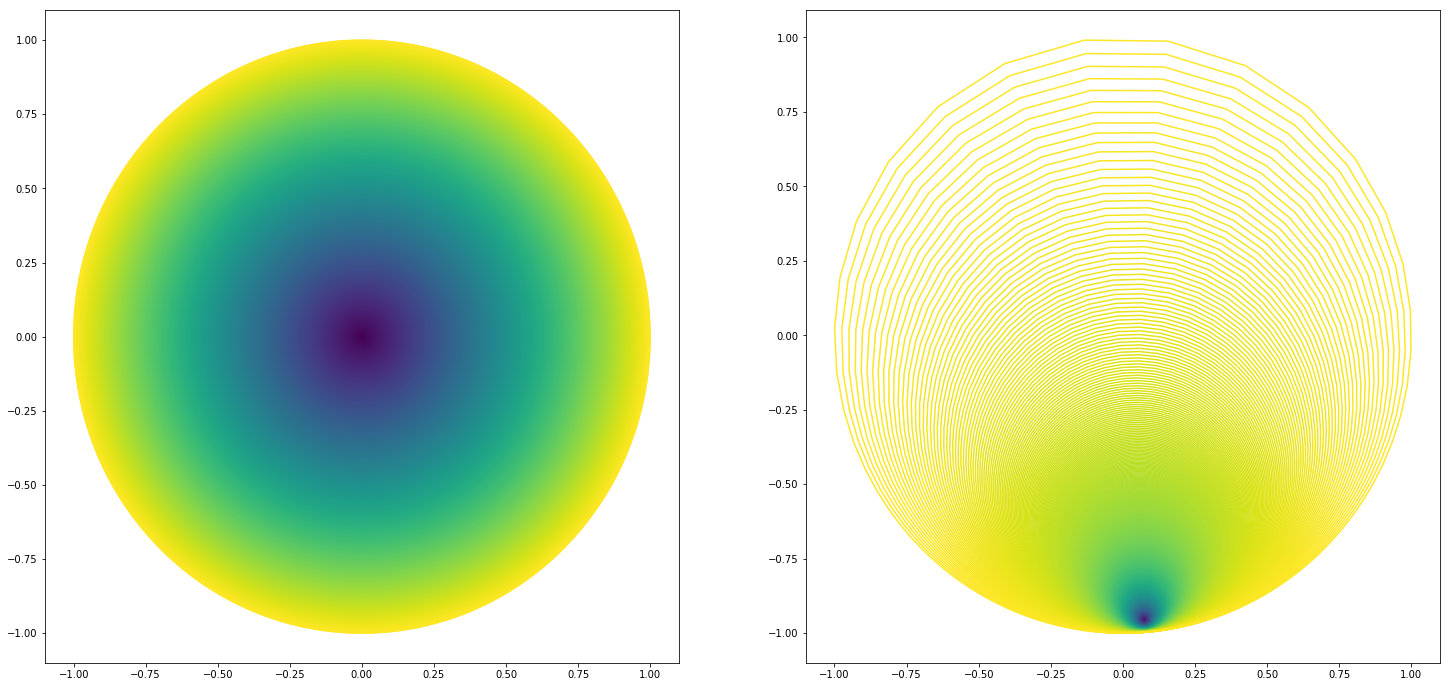

In [215]:
#Debuxo 2 gráficos: dominio e imaxe
#Cada curva corresponderase coa súa cor
fig, (eix1, eix2)=plt.subplots(1,2,figsize=(25,12))
#Tomo NUM_PTOS_OBXECTO puntos en cada circunferencia
t=np.linspace(0,1,NUM_PTOS_OBXECTO)
#Tomo NUM_OBXECTOS circunferencias dentro do disco
raio=np.linspace(0,1,NUM_OBXECTOS)

for r in raio:
    z=d1(r,t) #tomo o perímetro da circunferencia
    cor=colors.to_rgba(colorMap(r))
    z2=moeb.avalia(z) #obteño conxunto imaxe
    eix1.plot(z.real,z.imag,color=cor)
    eix2.plot(z2.real,z2.imag,color=cor)


##### Transformación das rectas radiais

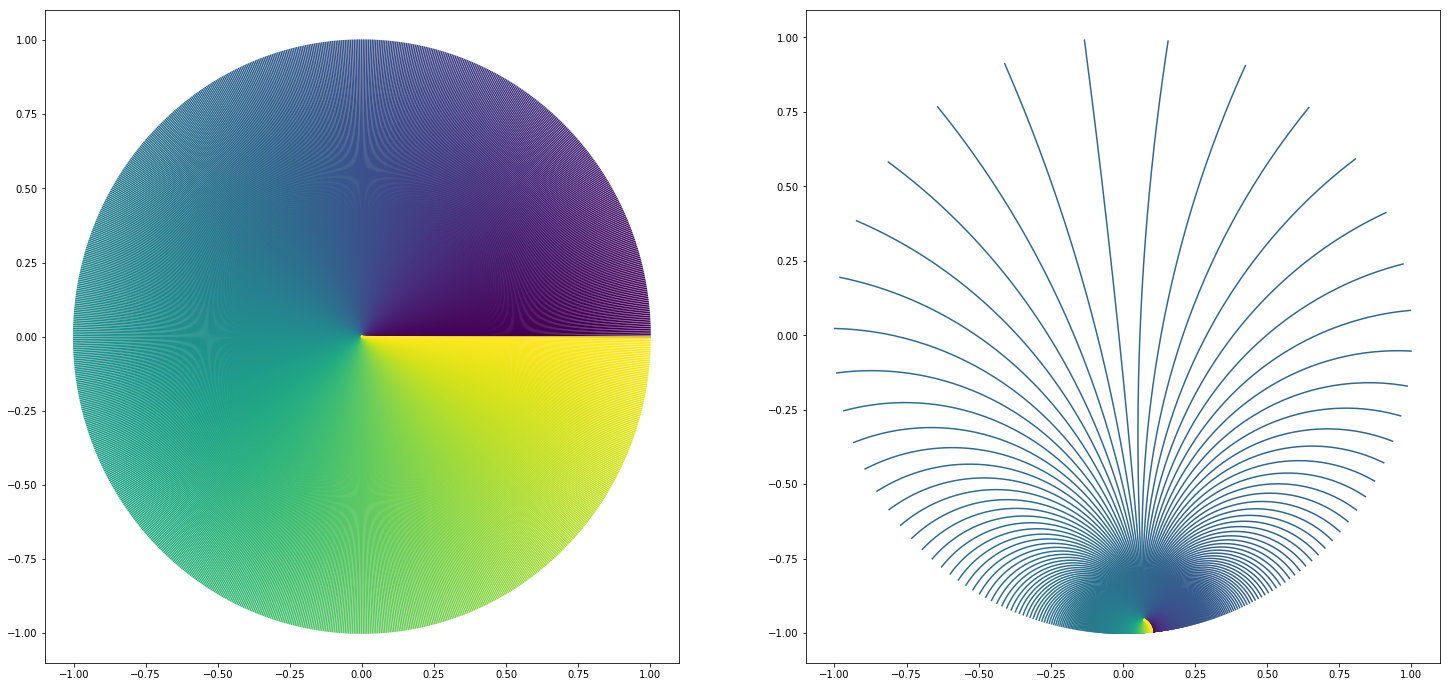

In [216]:
fig, (eix1, eix2)=plt.subplots(1,2,figsize=(25,12))
#Tomo NUM_PTOS_OBXECTO puntos en cada recta
t=np.linspace(0,1,NUM_PTOS_OBXECTO)
#Tomo NUM_OBXECTOS rectas do disco
angulos=np.linspace(0,2*np.pi,NUM_OBXECTOS)
for alfa in angulos:
    z=radial(alfa,t) #tomo a recta radial de ángulo alfa
    cor=colors.to_rgba(colorMap(alfa/(2*np.pi)))
    z2=moeb.avalia(z) #obteño conxunto imaxe
    eix1.plot(z.real,z.imag,color=cor)
    eix2.plot(z2.real,z2.imag,color=cor)

#### Transformación das rectas horizontais

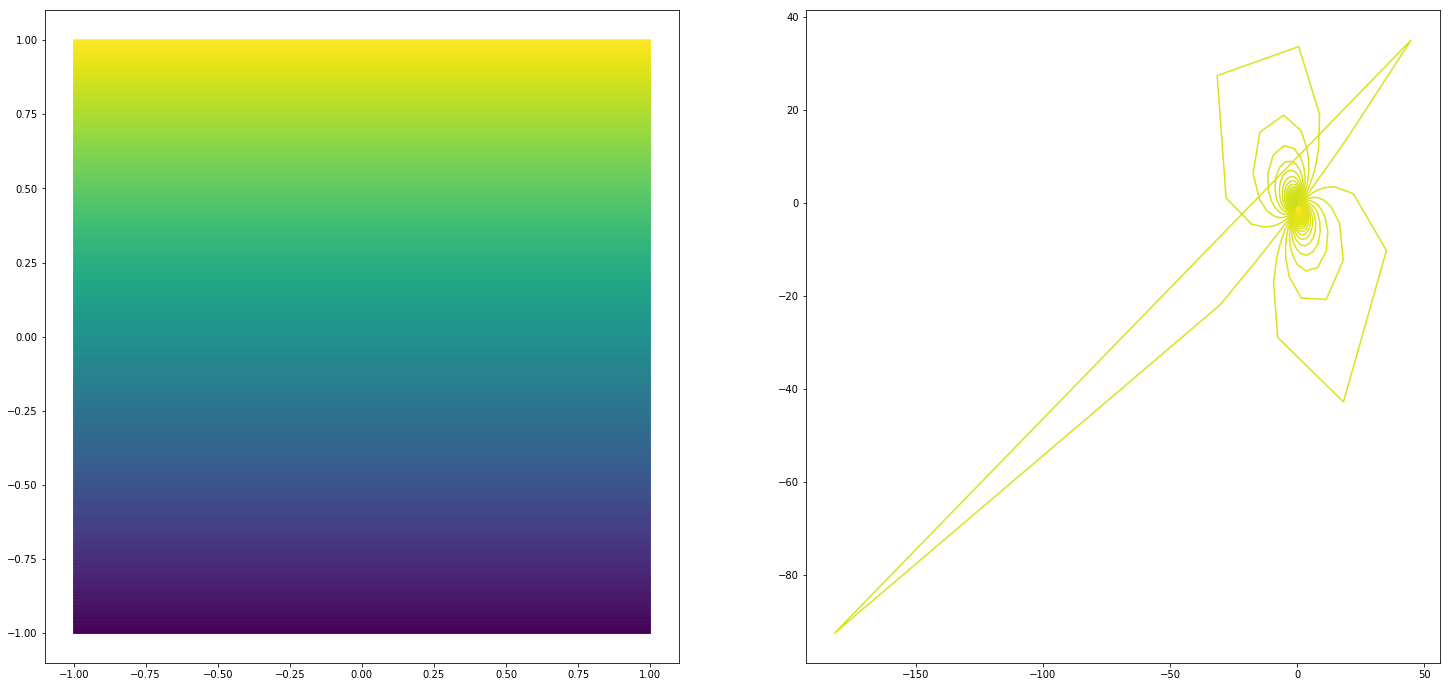

In [217]:
fig, (eix1, eix2)=plt.subplots(1,2,figsize=(25,12))
#Tomo NUM_PTOS_OBXECTO puntos en cada recta
t=np.linspace(-1,1,NUM_PTOS_OBXECTO)
#Tomo NUM_OBXECTOS rectas do disco
rectasH=np.linspace(-1,1,NUM_OBXECTOS)
for recta in rectasH:
    z=t+recta*1.j #tomo a recta horizontal
    cor=colors.to_rgba(colorMap((recta+1)/2))
    z2=moeb.avalia(z) #obteño conxunto imaxe
    eix1.plot(z.real,z.imag,color=cor)
    eix2.plot(z2.real,z2.imag,color=cor)

#### Transformación das rectas verticais

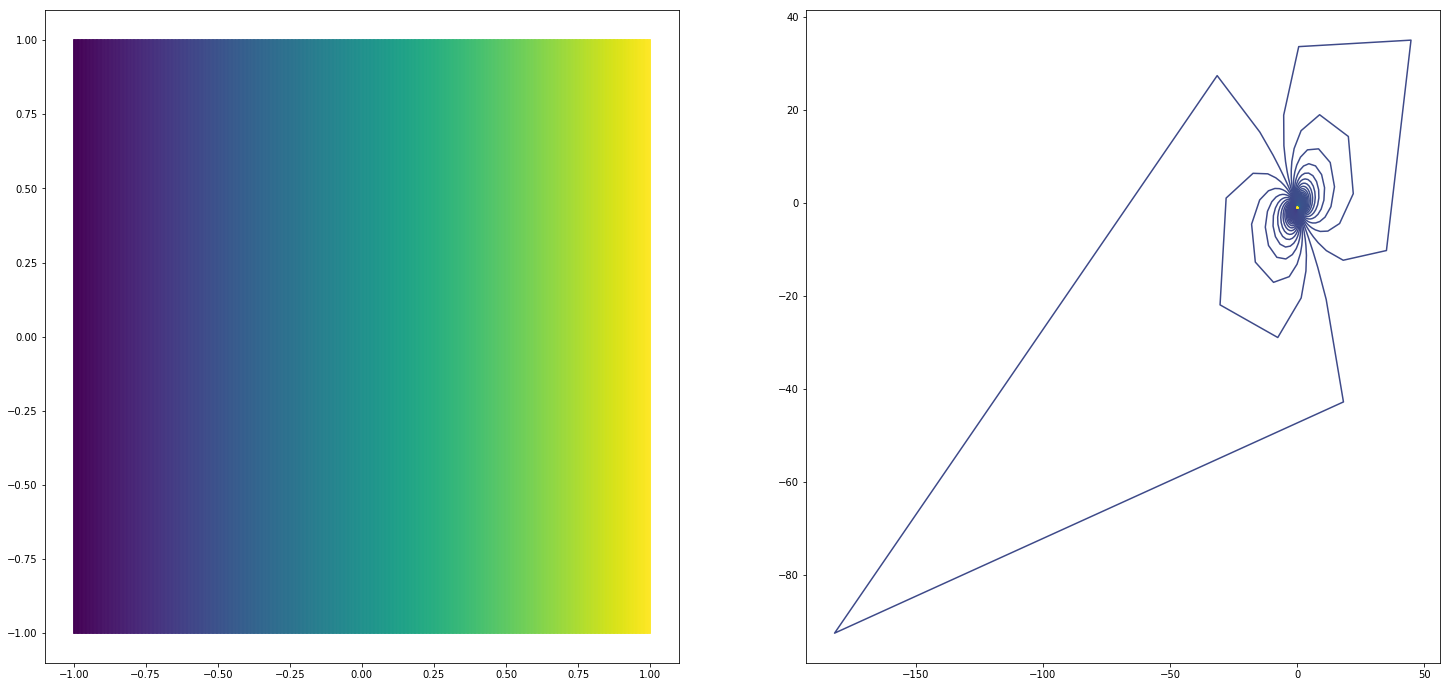

In [218]:
fig, (eix1, eix2)=plt.subplots(1,2,figsize=(25,12))
#Tomo NUM_PTOS_OBXECTO puntos en cada recta
t=np.linspace(-1,1,NUM_PTOS_OBXECTO)
#Tomo NUM_OBXECTOS rectas do disco
rectasV=np.linspace(-1,1,NUM_OBXECTOS)
for recta in rectasV:
    z=recta+t*1.j #tomo a recta vertical
    cor=colors.to_rgba(colorMap((recta+1)/2))
    z2=moeb.avalia(z) #obteño conxunto imaxe
    eix1.plot(z.real,z.imag,color=cor)
    eix2.plot(z2.real,z2.imag,color=cor)